# Activation Visualization MNIST

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mp
import tensorflow.contrib.slim as slim
import math
from tensorflow.examples.tutorials.mnist import input_data

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
mnist=input_data.read_data_sets('./data/mnist/', one_hot=True)

Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


In [7]:
x=tf.placeholder(tf.float32,[None,784])
y_true=tf.placeholder(tf.float32, [None, 10])

prob=tf.placeholder("float")

x_image=tf.reshape(x,[-1, 28 ,28, 1])

conv1=slim.conv2d(x_image,5,[5,5])
pool1=slim.max_pool2d(conv1,[2,2])

conv2=slim.conv2d(pool1, 5, [5,5])
pool2=slim.max_pool2d(conv2, [2,2])

conv3=slim.conv2d(pool2,20,[5,5])
layer=slim.dropout(conv3, prob)

y_out = slim.fully_connected(slim.flatten(layer),10,activation_fn=tf.nn.softmax)

In [8]:
cross_entropy = -tf.reduce_sum(y_true*tf.log(y_out))
correct_prediction = tf.equal(tf.argmax(y_out,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [27]:
img_size=28

img_size_flat=img_size*img_size
img_shape=(img_size, img_size)

num_classes=10

weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))

In [25]:
sess=tf.Session()
session=sess
sess.run(tf.global_variables_initializer())

## Train the model

In [31]:
batch_size=128

def optimize(epochs):
    for i in range(epochs):
        batch = mnist.train.next_batch(batch_size)
        sess.run(train_step, feed_dict={x:batch[0],y_true:batch[1], prob:0.5})
        if i % 100 == 0 and i != 0:
            trainAccuracy = sess.run(accuracy, feed_dict={x:batch[0],y_true:batch[1], prob:0.5})
            print("step %d, training accuracy %g"%(i, trainAccuracy))

## Testing accuracy

In [22]:
def print_test_accuracy():
    testAccuracy = sess.run(accuracy, feed_dict={x:mnist.test.images,y_true:mnist.test.labels, prob:0.5})
    print("test accuracy %g"%(testAccuracy))

## Helper Functions

In [19]:
def getActivations(layer,stimuli):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F'), prob:0.5})
    plotNNFilter(units)

def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

# Execute

In [29]:
print_test_accuracy()

test accuracy 0.0821


In [34]:
optimize(1000)

step 100, training accuracy 0.507812
step 200, training accuracy 0.671875
step 300, training accuracy 0.71875
step 400, training accuracy 0.820312
step 500, training accuracy 0.796875
step 600, training accuracy 0.898438
step 700, training accuracy 0.9375
step 800, training accuracy 0.882812
step 900, training accuracy 0.9375


In [33]:
print_test_accuracy()  ## before optimization

test accuracy 0.3724


In [35]:
print_test_accuracy()   ## after optimization

test accuracy 0.8993


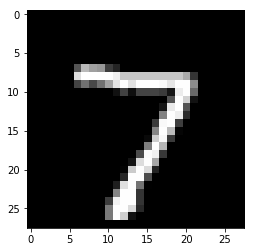

In [36]:
imageToUse = mnist.test.images[0]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")

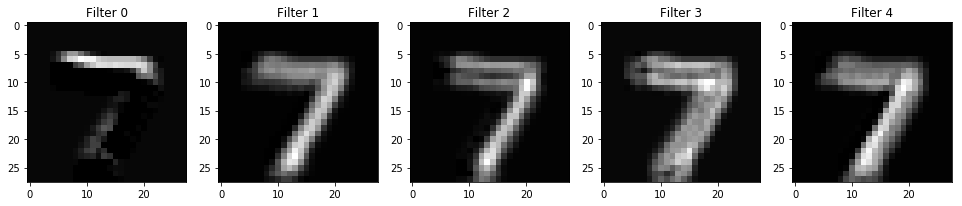

In [38]:
getActivations(conv1,imageToUse)

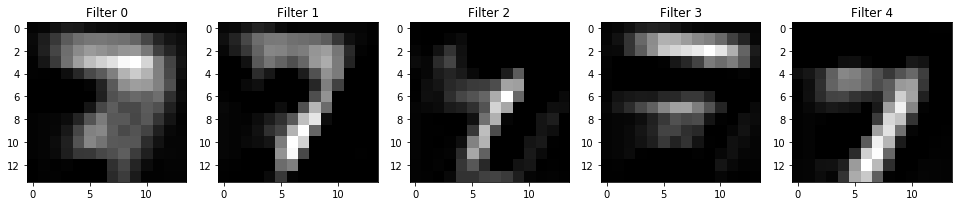

In [39]:
getActivations(conv2,imageToUse)

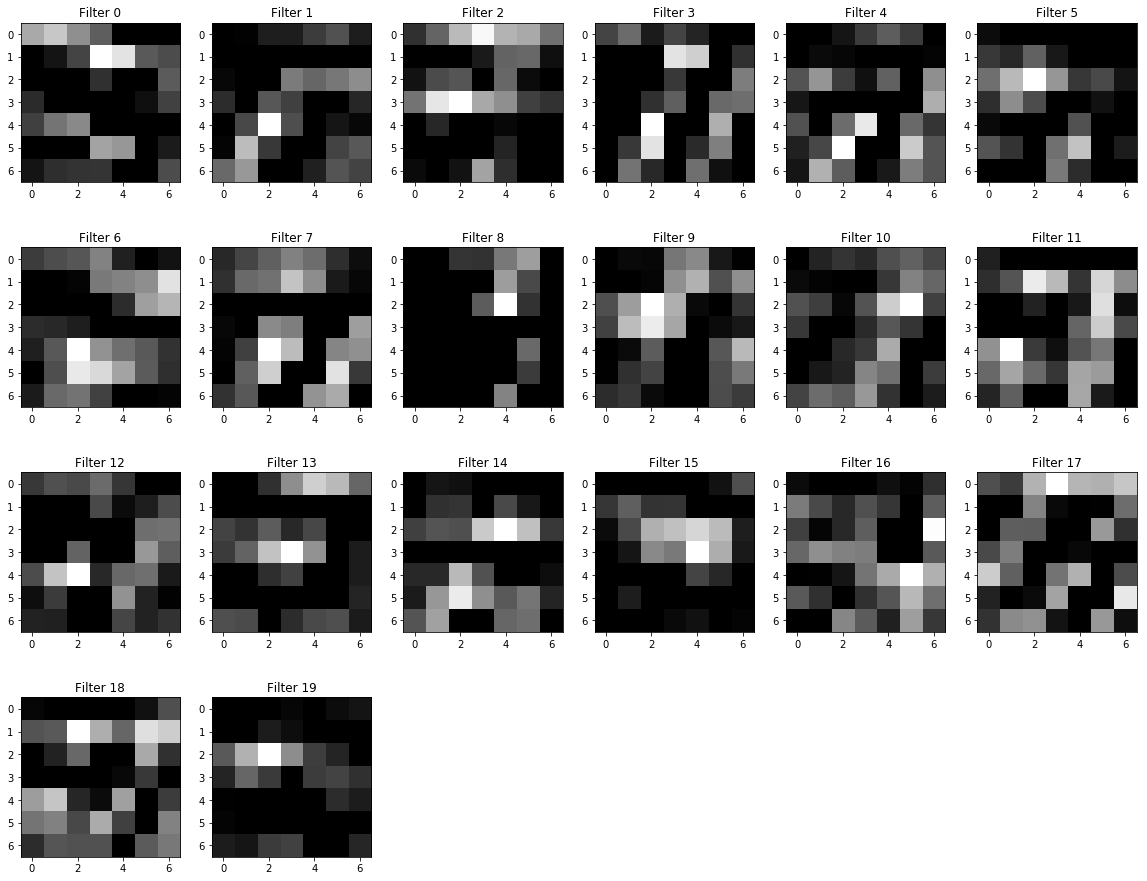

In [40]:
getActivations(conv3,imageToUse)

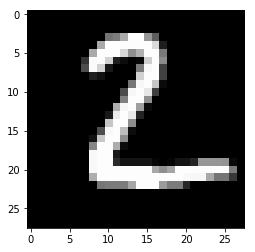

In [41]:
imageToUse = mnist.test.images[1]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")

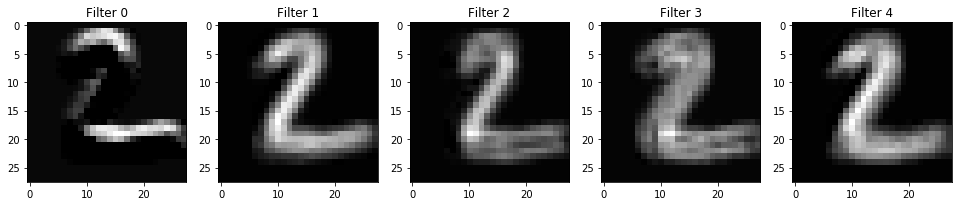

In [42]:
getActivations(conv1,imageToUse)

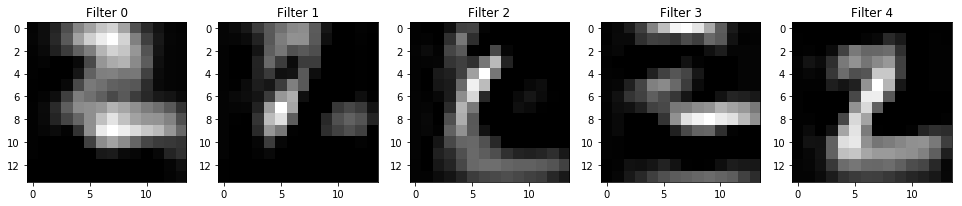

In [43]:
getActivations(conv2,imageToUse)

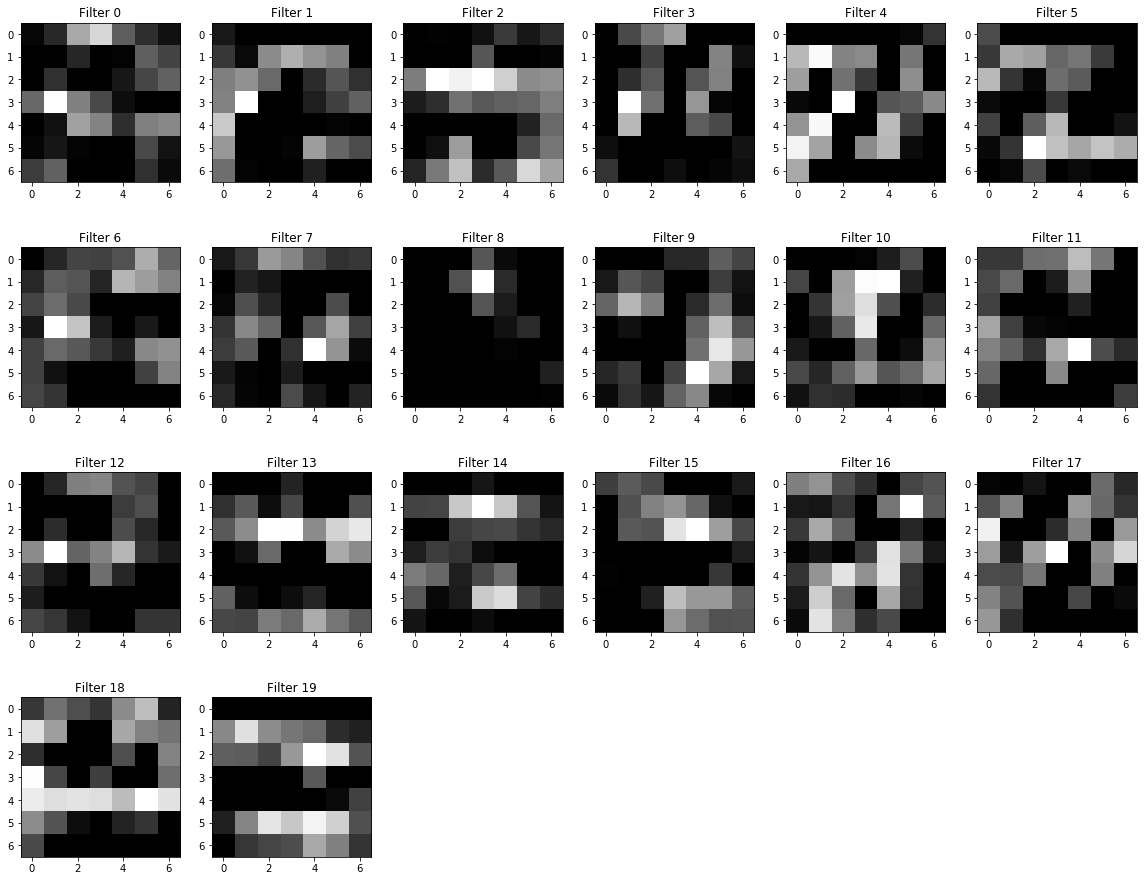

In [44]:
getActivations(conv3,imageToUse)

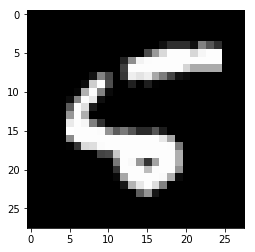

In [48]:
imageToUse = mnist.test.images[8]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")

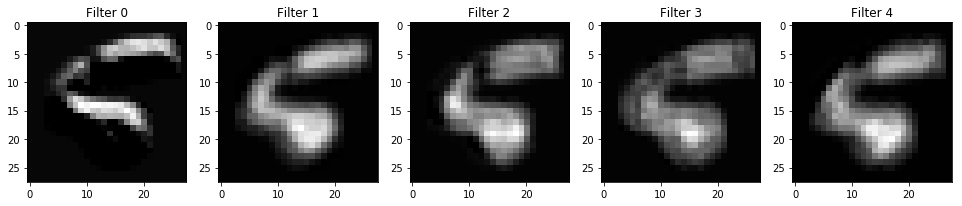

In [52]:
getActivations(conv1,imageToUse)

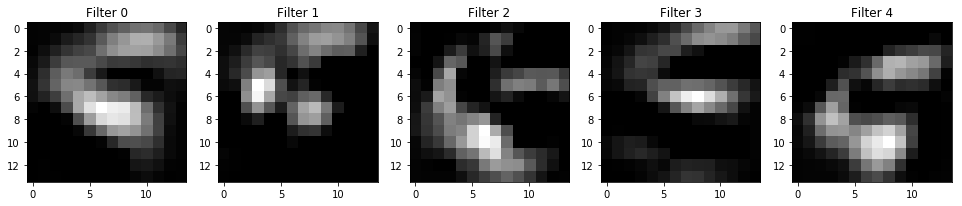

In [50]:
getActivations(conv2,imageToUse)

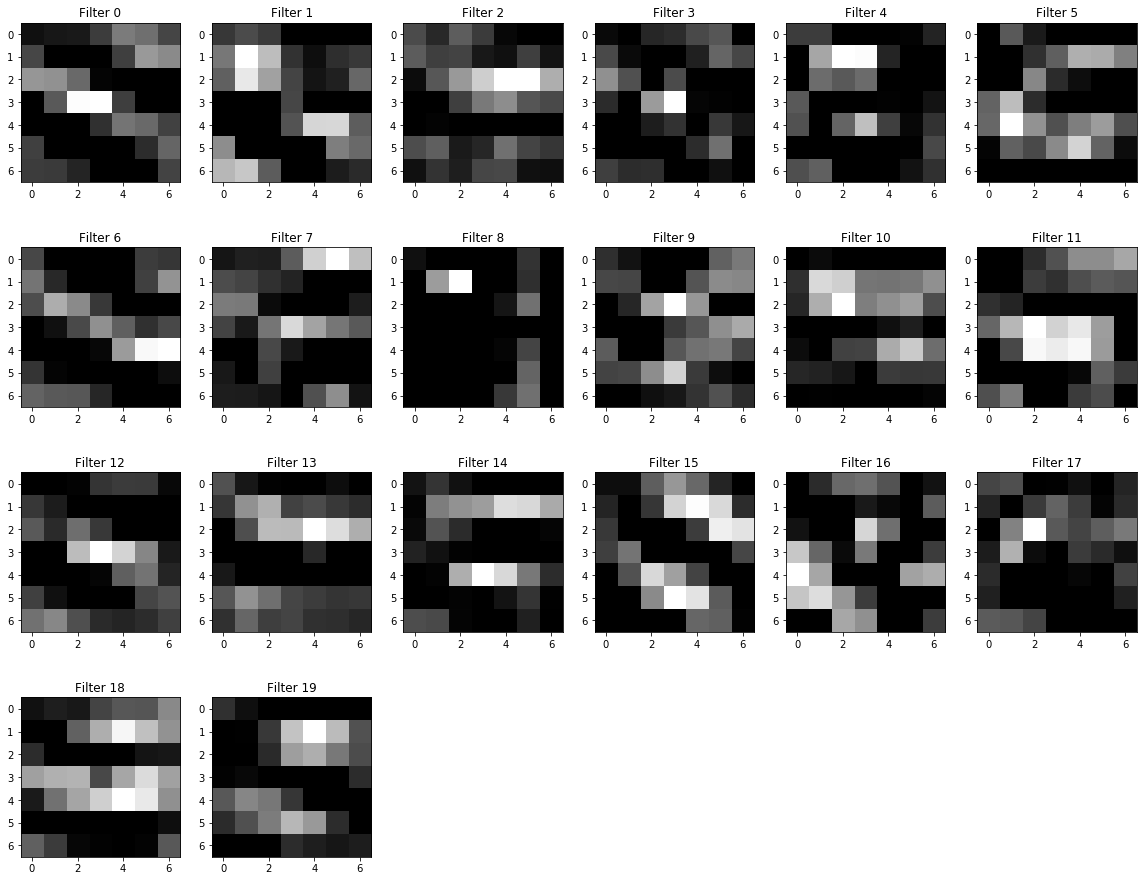

In [51]:
getActivations(conv3,imageToUse)